# Programming Assignment: k-means algorithm
## Name : 백찬희
## Student ID : 20142503
## Github : https://github.com/Baekchanhee/assignment04.git

# 필요한 패키지들 추가하기

In [1]:
import pandas as pd
import numpy as np #데이터 처리를 위한 모듈
import matplotlib.pyplot as plt #데이터 시각화를 위한 모듈
import hypertools as hyp #다차원 시각화를 위한 모듈
import seaborn as sns 

sns.set(style="darkgrid")

# 파일 입출력을 위한 코드

In [2]:
file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

# 이미지 관련 변수들

In [3]:
size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

# 입력데이터 normalize 하는 함수

In [4]:
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

# 두 벡터 사이의 거리를 구하는 함수

In [5]:
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

# 벡터 형태의 이미지들을 한 행렬로 변환 및 dataframe에 초기화
## 이미지갯수 1000개로 제한 (실행시간이 오래걸려서)

In [6]:
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1
    
df = pd.DataFrame(list_image)
df = df.T
df['category'] = list_label   #실제 label
random_label = np.random.randint(10, size=(10000, 1)) #random label 설정
df['label'] = random_label
df = df[:1000] # 너무 시간 오래걸려서 1000으로 제한
df

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,category,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,9
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,9
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,6
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,6
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,2


# 실제 label 에 따른 이미지 시각화 (1000개)

C:\Users\Baek\Anaconda3\lib\site-packages\hypertools\plot\plot.py:230: UserWarning: Group will be deprecated. Please use hue keyword argument. See docs for details: http://hypertools.readthedocs.io/en/latest/hypertools.plot.html#hypertools.plot
  warnings.warn('Group will be deprecated. Please use '
C:\Users\Baek\Anaconda3\lib\site-packages\hypertools\tools\df2mat.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  plot_data = df_num.as_matrix()


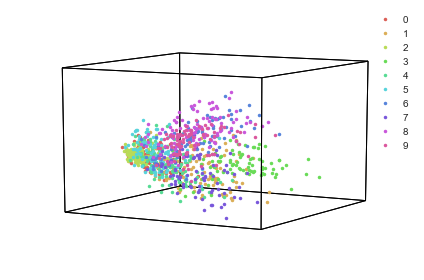

In [7]:
real_label = df['category']
images = hyp.plot(df.iloc[:,0:784],'.', group=real_label, legend=list(set(real_label)))

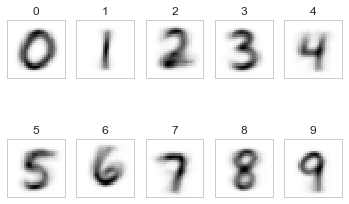

In [8]:
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(1000):

    im_average[:, df.iloc[i,784]] += list_image[:, i]
    im_count[df.iloc[i,784]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]
    
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# Centroid를 계산하는 함수 

In [9]:
def computeCentroid(k, df, n):    # k : number of clusters , df : dataframe 
                                  # n : vector size (784)
    centroids = []                # list
    
    for i in range(k):        
        i_labeled = df[df['label'] == i]   # label이 i인 dataframe만 선택
        means = np.zeros(n, dtype=float)
        for j in range(n):            
            means[j] = np.mean(i_labeled.iloc[:,j]) # column 0 ~ 783
            
        centroids.append(means) # centroids list에 추가
    
    return centroids

# initial centroid 계산

In [10]:
recent_centroids = computeCentroid(10, df, size_row * size_col)

# label을 할당하는 함수

In [11]:
 # k: number of clusters // nop: number of points// df: dataframe // centroids: recent centroids
def assignLabel(k, nop, n, df, centroids):  # n: vector size
        for i in range(nop):   # point 갯수만큼 반복
            vector = np.zeros(n, dtype=float)
            for j in range(n):
                vector[j] = df.iloc[i,j]                 
            
            # 가장 가까운 cluster를 0번째 cluster로 가정하고 distance까지 구함
            closest = 0       
            closest_distance = distance(vector, centroids[0])                                           
            
            for p in range(1, k): # cluster 1 ~ cluster k -1 까지 반복
                current_distance = distance(vector, centroids[p])
                if closest_distance > current_distance :
                    closest = p
                    closest_distance = current_distance
                    
            # 가장 가까운 cluster number를 label로 할당
            df.iloc[i,785] = closest
            
        return df              

# initial label 할당

In [12]:
df = assignLabel(10, 1000, size_row * size_col, df, recent_centroids)

# energy를 계산하는 함수 

In [13]:
def computeEnergy(df, nop, n, centroids):
    
    energy = 0  # energy
    
    for i in range(nop):         # point 갯수만큼 반복
            vector = np.zeros(n, dtype=float)
            for j in range(n):
                vector[j] = df.iloc[i,j]
                
            label = df.iloc[i,785] # label
            # 각 point가 속하는 centroid와의 거리 총합
            energy +=  distance(vector, centroids[label])
            
    energy /= nop  # 거리 총합에서 평균이 energy
    
    return energy

# accuracy를 계산하는 함수

In [14]:
def computeAccuracy(df, k):
    
    accuracy = 0 # accuracy
    for i in range(k):
        
        category_count = np.zeros(10, dtype=int) # i_label에 해당하는 cluster에
                                                 # 어떤 category들이 많은지 세는 배열
        
        i_labeled = df[df['label'] == i]
        count = i_labeled.shape[0]
        for j in range(count):
            category_count[i_labeled.iloc[j,784]] += 1
        
        largest = 0 # 0번쨰가 가장 많다고 가정
        for p in range(1, 10):
            if category_count[p] > category_count[largest]:
                largest = p
        
        accuracy += (category_count[largest] / count)
    
    accuracy = accuracy / k  # 개별 클러스터별 accuracy를 다 더하고 클러스터 갯수로 나누어 준다
    
    return accuracy            

# 초기 이미지

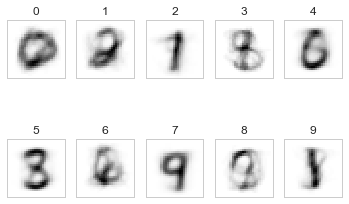

In [15]:
f3 = plt.figure(3)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(1000):

    im_average[:, df.iloc[i,785]] += list_image[:, i]
    im_count[df.iloc[i,785]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]
    
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# centroid 가 변하지 않을 때까지 label 할당과 centroid 변경

In [16]:
energy = []
accuracy = []
count = 0
old_energy = 0
while True:    
    recent_centroids = computeCentroid(10, df, size_row * size_col)
    df = assignLabel(10, 1000, size_row * size_col, df, recent_centroids)   
    
    
    e = computeEnergy(df, 1000, 784, recent_centroids)
    a = computeAccuracy(df, 10)
    energy.append(e)
    accuracy.append(a)
    # energy, accuracy  출력
    print("Energy: %f" % e) 
    print("Accuracy: %f" % a)     
    
   
    if count == 0:
        count += 1
        old_energy = e
        continue
    
     # if converged
    if old_energy == e:
        break
    
    count += 1 # 무한루프 빠지지 않게
   
    if count == 10:
        break

Energy: 40.473340
Accuracy: 0.440169
Energy: 39.138426
Accuracy: 0.477954
Energy: 38.572368
Accuracy: 0.492358
Energy: 38.319618
Accuracy: 0.500547
Energy: 38.152516
Accuracy: 0.512552
Energy: 38.037502
Accuracy: 0.533901
Energy: 37.919376
Accuracy: 0.548934
Energy: 37.811171
Accuracy: 0.573558
Energy: 37.667111
Accuracy: 0.583552
Energy: 37.579849
Accuracy: 0.591730


# 최종 이미지(최대 10회반복)

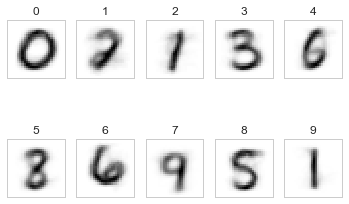

In [17]:
f4 = plt.figure(4)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(1000):

    im_average[:, df.iloc[i,785]] += list_image[:, i]
    im_count[df.iloc[i,785]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]
    
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# 반복횟수에 따른 energy, accuracy 변화

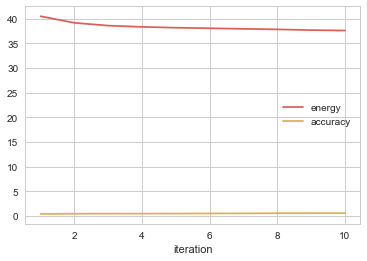

In [18]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

plt.plot(x, energy, label= 'energy')
plt.plot(x, accuracy, label= 'accuracy')

plt.xlabel('iteration')
plt.legend()
plt.show()

# 반복할 수록 energy는 내려가고 accuracy는 올라가는 것을 확인 할 수 있다.
# 10000개는 시간이 너무 걸려 1000개로 진행했다.
# 반복횟수도 10회로 제한했다.